In [2]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

# imports
import pickle
import os
from pathlib import Path

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature

from src.utils.data_utils import DataMapping
import src.utils.standard_plots as sp

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


# Display first per month prediction

<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ehate\AppData\Local\Temp\ipykernel_10512\3108229393.py:13: SyntaxWarning: invalid escape sequence '\p'
  datadir = Path('data\processed\predictions')


C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
Load data...
Preprocess data...
Create plots...
Load data...
Preprocess data...
Create plots...


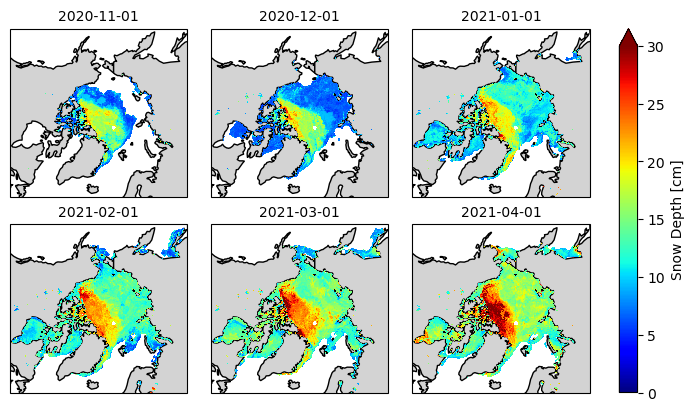

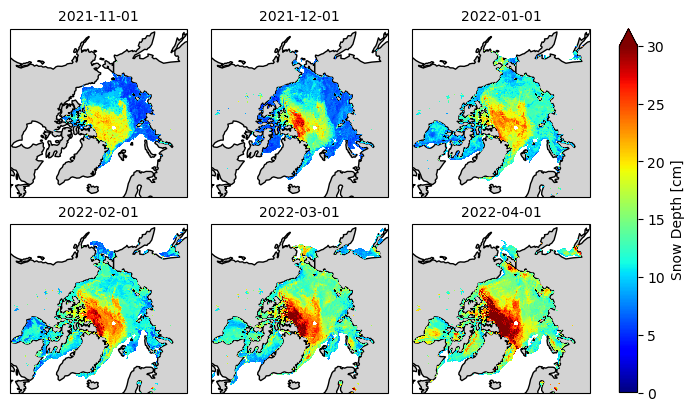

In [1]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

from matplotlib.animation import FuncAnimation, PillowWriter
from pyproj import Transformer
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from pathlib import Path

datadir = Path('data\processed\predictions')
start_years = [2020, 2021]

for start_year in start_years:
    print("Load data...")
    dates = [f'{start_year}-11-01', f'{start_year}-12-01',
            f'{start_year+1}-01-01', f'{start_year+1}-02-01',
            f'{start_year+1}-03-01', f'{start_year+1}-04-01']
    files = [datadir / f'ASP_snow_depth_predictions_{date}.nc' for date in dates]
    ds = xr.open_mfdataset(files)

    print("Preprocess data...")
    ds = ds.coarsen(x=4, y=4).mean()
    transformer = Transformer.from_crs("EPSG:6931", "EPSG:4326", always_xy=True)
    X,Y = np.meshgrid(ds['x'].values, ds['y'].values)
    lon, lat = transformer.transform(X, Y)
    var = ds['sd']*100  # convert to cm

    print("Create plots...")
    fig, ax = plt.subplots(2, 3, figsize=(7, 4),
                        subplot_kw={'projection': ccrs.NorthPolarStereo()}, layout='constrained')
    ax = ax.ravel()
    for i, date in enumerate(dates):
        im = ax[i].pcolormesh(lon, lat, var.isel(time=i), cmap='jet', vmin=0, vmax=30, transform=ccrs.PlateCarree())
        ax[i].set_title(f'{date}', fontsize=10)
        ax[i].add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
        ax[i].set_extent([-4500000, 3200000, -3000000, 4300000], crs=ccrs.NorthPolarStereo())
    fig.colorbar(im, orientation='vertical', label='Snow Depth [cm]', ax=ax.tolist(), extend='max')
    fig.savefig(f'data/fig/ASP_day1_snow_depth_maps_{start_year}-{start_year+1}.png', dpi=300)

# Display monthly average prediction

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
Load data...
Preprocess data...
Create plots...
Load data...
Preprocess data...
Create plots...


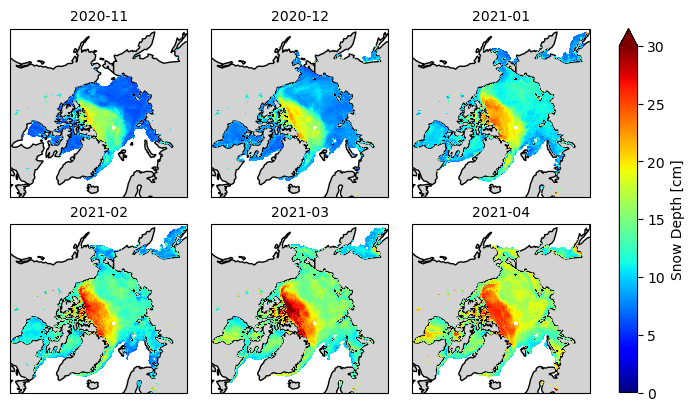

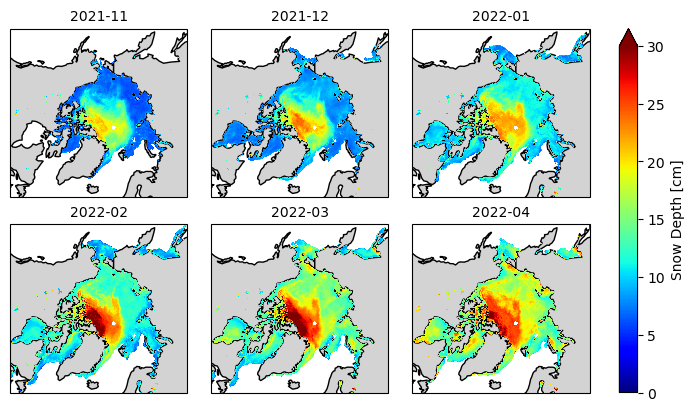

In [1]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

from matplotlib.animation import FuncAnimation, PillowWriter
from pyproj import Transformer
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from pathlib import Path

datadir = Path('data/processed/predictions_v1.2_monthly-mean')
start_years = [2020, 2021]

for start_year in start_years:
    print("Load data...")
    dates = [f'{start_year}-11', f'{start_year}-12',
            f'{start_year+1}-01', f'{start_year+1}-02',
            f'{start_year+1}-03', f'{start_year+1}-04']
    files = [datadir / f'ASP_snow_depth_prediction_{date}.nc' for date in dates]
    ds = xr.open_mfdataset(files)

    print("Preprocess data...")
    ds = ds.coarsen(x=4, y=4).mean()
    transformer = Transformer.from_crs("EPSG:6931", "EPSG:4326", always_xy=True)
    X,Y = np.meshgrid(ds['x'].values, ds['y'].values)
    lon, lat = transformer.transform(X, Y)
    var = ds['sd']*100  # convert to cm

    print("Create plots...")
    fig, ax = plt.subplots(2, 3, figsize=(7, 4),
                        subplot_kw={'projection': ccrs.NorthPolarStereo()}, layout='constrained')
    ax = ax.ravel()
    for i, date in enumerate(dates):
        im = ax[i].pcolormesh(lon, lat, var.isel(time=i), cmap='jet', vmin=0, vmax=30, transform=ccrs.PlateCarree())
        ax[i].set_title(f'{date}', fontsize=10)
        ax[i].add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
        ax[i].set_extent([-4500000, 3200000, -3000000, 4300000], crs=ccrs.NorthPolarStereo())
    fig.colorbar(im, orientation='vertical', label='Snow Depth [cm]', ax=ax.tolist(), extend='max')
    fig.savefig(f'data/fig/ASP_monthly_snow_depth_maps_{start_year}-{start_year+1}.png', dpi=300)

# Analyze DOY dependence


C:\Users\ehate\AppData\Local\Temp\ipykernel_10512\3917061902.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
C:\Users\ehate\AppData\Local\Temp\ipykernel_10512\3917061902.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
C:\Users\ehate\AppData\Local\Temp\ipykernel_10512\3917061902.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
C:\Users\ehate\AppData\Local\Temp\ipykernel_10512\3917061902.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize

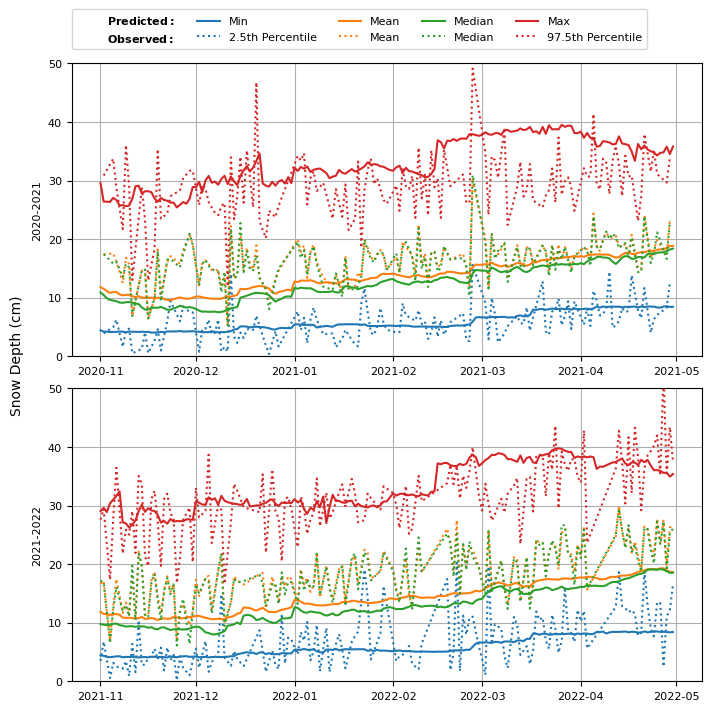

In [3]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

start_years = [2020, 2021]
secondary_ids = ['2020-2021', '2021-2022']
data_frame_file =  Path('data/intermediate/datasets/EASE2_LARM-smoothed_N3.125km_v1.1/ASP_full.parquet')

fig, axs = plt.subplots(2,1,figsize=(7, 7), layout='constrained')

for ax, start_year, secondary_id in zip(axs, start_years, secondary_ids):
    df = pd.read_parquet(data_frame_file)
    df = df[(df['primary_id'] == 'C2I') & (df['secondary_id'] == secondary_id)]

    df['date'] = df['time'].dt.date
    df['sd'] = df['SD_mean'] * 100  # convert to cm
    stats = df.groupby('date').agg(
        date = ('date', 'first'),
        sd_mean = ('sd', 'mean'),
        sd_min = ('sd', 'min'),
        sd_max = ('sd', 'max'),
        sd_median = ('sd', 'median'),
        sd_025 = ('sd', lambda x: np.percentile(x, 2.5)),
        sd_975 = ('sd', lambda x: np.percentile(x, 97.5))
    )

    daterange = pd.date_range(start=f'{start_year}-11-01', end=f'{start_year+1}-04-30', freq='D')

    file_template = Path('data/processed/predictions/ASP_snow_depth_predictions_{date}.nc')

    min_values = []
    mean_values = []
    median_values = []
    max_values = []

    for d in daterange:
        file_path = file_template.with_name(file_template.name.format(date=d.strftime('%Y-%m-%d')))
        ds = xr.open_dataset(file_path)
        sd_cm = ds['sd'] * 100  # convert to cm
        min_values.append(float(sd_cm.min().values))
        mean_values.append(float(sd_cm.mean().values))
        median_values.append(float(sd_cm.median().values))
        max_values.append(float(sd_cm.max().values))

    # Dummy (invisible) handles for titles
    ax.plot([], [], color='none', label=r"$\bf{Predicted:}$")
    ax.plot([], [], color='none', label=r"$\bf{Observed:}$")

    ax.plot(daterange, min_values, label='Min', color='tab:blue')
    ax.plot(stats['date'], stats['sd_025'], ':', label='2.5th Percentile', color='tab:blue')

    ax.plot(daterange, mean_values, label='Mean', color='tab:orange')
    ax.plot(stats['date'], stats['sd_mean'], ':', label='Mean', color='tab:orange')

    ax.plot(daterange, median_values, label='Median', color='tab:green')
    ax.plot(stats['date'], stats['sd_median'], ':', label='Median', color='tab:green')

    ax.plot(daterange, max_values, label='Max', color='tab:red')
    ax.plot(stats['date'], stats['sd_975'], ':', label='97.5th Percentile', color='tab:red')

    ax.set_ylim(0,50)
    ax.set_ylabel(secondary_id, fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
    ax.grid()

axs[0].legend(ncols=5, fontsize=8, loc=(0, 1.05))
fig.supylabel('Snow Depth (cm)', fontsize=10)
fig.savefig('data/fig/ASP_snow_depth_time_series_comparison.pdf', dpi=300)
plt.show()


# Create GIF

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
Load data...
Preprocess data...
Initialize plot...
Creating GIF...


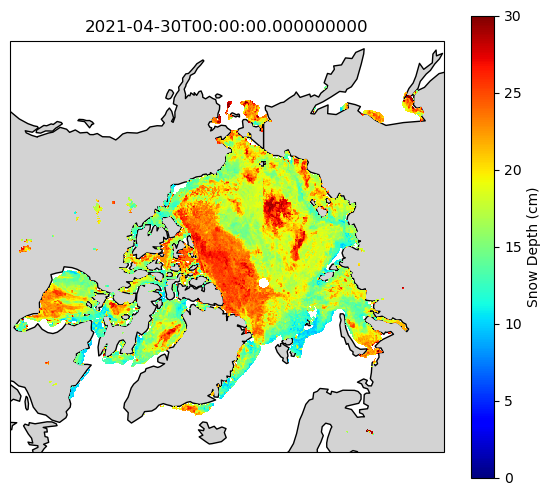

In [4]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

from matplotlib.animation import FuncAnimation, PillowWriter
from pyproj import Transformer
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from pathlib import Path

time_range = pd.date_range(start='2020-11-01', end='2021-04-30', freq='D')
output_gif = "data/fig/2020-2021_animation_full.gif"

print("Load data...")
sd_files = [Path(f'data/processed/predictions/ASP_snow_depth_predictions_{date.strftime("%Y-%m-%d")}.nc') for date in time_range]
ds = xr.open_mfdataset(sd_files, combine='nested', concat_dim='time')
ds = ds.coarsen(x=4, y=4).mean()

print("Preprocess data...")
#ds = ds.coarsen(x=4, y=4).mean()
transformer = Transformer.from_crs("EPSG:6931", "EPSG:4326", always_xy=True)
X,Y = np.meshgrid(ds['x'].values, ds['y'].values)
lon, lat = transformer.transform(X, Y)
var = ds['sd']*100  # convert to cm

print("Initialize plot...")
fig, ax = plt.subplots(figsize=(7, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()})
im = ax.pcolormesh(lon, lat, var.isel(time=0), cmap='jet', vmin=0, vmax=30, transform=ccrs.PlateCarree())
#ax.coastlines()
fig.colorbar(im, ax=ax, label='Snow Depth (cm)')
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='lightgray')
title = ax.set_title(str(var.time.values[0]))
ax.set_extent([-4500000, 3200000, -3000000, 4300000], crs=ccrs.NorthPolarStereo())


# --- Animation update function ---
def update(frame_idx):
    frame_data = var.isel(time=frame_idx)
    im.set_array(frame_data)
    title.set_text(str(frame_data.time.values))
    return [im, title]

print("Creating GIF...")
# --- Create animation ---
ani = FuncAnimation(
    fig,
    update,
    frames=len(var.time),
    interval=200,   # milliseconds between frames (adjust for speed)
    blit=True
)

# --- Save as GIF ---
writer = PillowWriter(fps=5)  # frames per second
ani.save(output_gif, writer=writer)

# Pred vs obs

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
Load data...
Create plot...
Plotting pcolormesh...
Plotting observation points...
Plotting pcolormesh...
Plotting observation points...


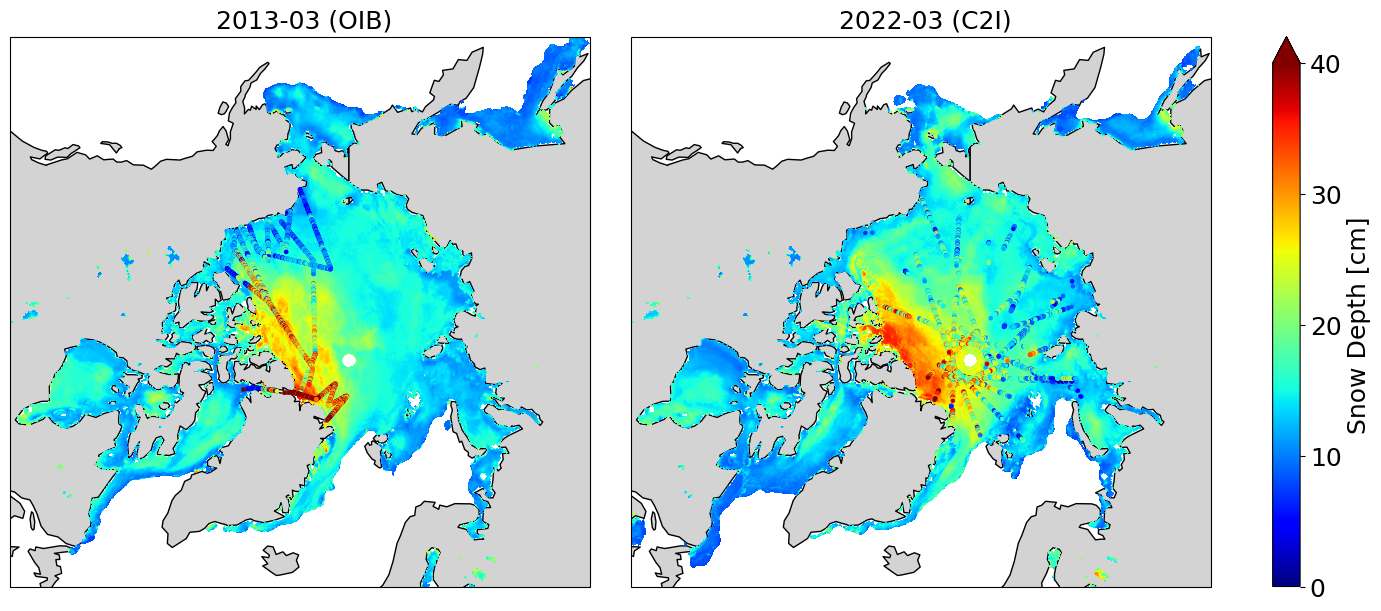

In [5]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

from matplotlib.animation import FuncAnimation, PillowWriter
from pyproj import Transformer
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from pathlib import Path


years = [2013,2022]
observations = ['OIB', 'C2I']
month = 3

print("Load data...")
data_frame_file =  Path('data/intermediate/datasets/EASE2_LARM-smoothed_N3.125km_v1.1/ASP_full.parquet')
df = pd.read_parquet(data_frame_file)
df = df.dropna()


transformer = Transformer.from_crs("EPSG:6931", "EPSG:4326", always_xy=True)


# Create plot
print("Create plot...")
fig, axs = plt.subplots(1,2,figsize=(14, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()}, layout='constrained')
for i, year in enumerate(years):
    ax = axs[i]
    obs = observations[i]
     # Plot model prediction
    
    pred_file = Path(f'data/processed/predictions_v1.2_monthly-mean/ASP_snow_depth_prediction_{year}-{month:02d}.nc')
    ds = xr.open_dataset(pred_file)
    ds = ds.coarsen(x=4, y=4).mean()
    X,Y = np.meshgrid(ds['x'].values, ds['y'].values)
    lon, lat = transformer.transform(X, Y)
    var = ds['sd']*100  # convert to cm

    print("Plotting pcolormesh...")
    im = ax.pcolormesh(lon, lat, var.isel(time=0), cmap='jet', vmin=0, vmax=40, transform=ccrs.PlateCarree())
    #fig.colorbar(im, ax=ax, label='Snow Depth (cm)')
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='lightgray')
    ax.set_extent([-4500000, 3200000, -3000000, 4300000], crs=ccrs.NorthPolarStereo())
    ax.set_title(f' {year}-{month:02d} ({obs})', fontsize=18)

    # Overlay observation points
    print("Plotting observation points...")
    month_df = df[(df['time'].dt.year == year) & (df['time'].dt.month == month)]
    obs_lons = month_df['lon'].values
    obs_lats = month_df['lat'].values
    obs_sds = month_df['SD_mean'].values * 100  # convert to cm
    sc = ax.scatter(obs_lons, obs_lats, c=obs_sds, cmap='jet', vmin=0, vmax=40, s=5, transform=ccrs.PlateCarree(), label='Observations')

#ax.legend()
cb = fig.colorbar(sc, ax=axs, label='Snow Depth [cm]', extend='max')
cb.set_ticks(np.arange(0, 45, 10))
cb.ax.tick_params(labelsize=18)
cb.set_label('Snow Depth [cm]', fontsize=18)
plt.savefig('data/fig/ASP_snow_depth_comparison_OIB_C2I_March.png', dpi=300)
plt.show()